# Описание работы - Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных. Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид  клиентские анкеты. Задача — провести анализ и подготовить план действий по удержанию клиентов.

## Цель работы - научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;проанализировать основные признаки, наиболее сильно влияющие на отток;сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:1) выделить целевые группы клиентов;2) предложить меры по снижению оттока;3) определить другие особенности взаимодействия с клиентами.

## Открытие файла и общая информация

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage 
import itertools

In [3]:
data.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

## Предобработка данных

### Поиск дубликатов

In [5]:
display(f'Дубликатов найдено - {data.duplicated().sum()} шт.')

'Дубликатов найдено - 0 шт.'

### Поиск пропусков

In [6]:
data.isna().sum()

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

In [7]:
data.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


### Посмотрите на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался

In [8]:
display(data.groupby('Churn').mean())

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


1 - ушли, 0 остались

Из данных видно не совсем понятно что обозначают не котрые данные например (Promo_friends)факт первоначальной записи в рамках акции «приведи друга», 0,18 это сколько осталось или сколько ушло? тоже самое сотрудник компании-партнёра клуба(Partner),и количество посещений за месяц (Group_visits),а вот по остальным пунктам понятнее чаще уходят с небольшим абонементом по данным среднее значение 1-2 месяца как для окончания абонемента так и на весь срок, в возрастной категории чаще идут в отток в возрасте 26-27 лет, время посещения наглядно показывает что те кто меньше посещали (Lifetime) в среднем 1 час чаще уходят, и чаще уходят кто не пользуются слугами допльнительного характера кафе, спорттовары и прочее, клинты уходящие в отток имеют показатели на уровне 115 осатльные показатели не сильно отлоичаются друг от друга типа как с телефоном который оставил клиент.

### Постройте столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток);

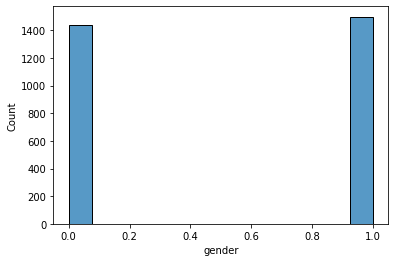

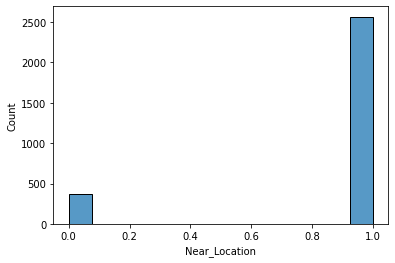

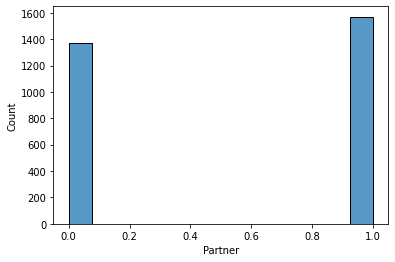

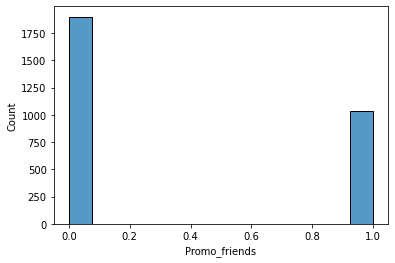

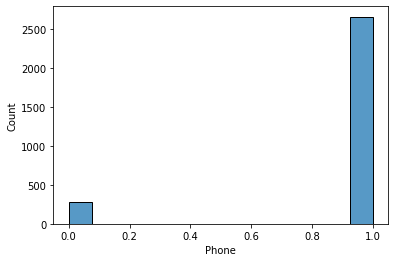

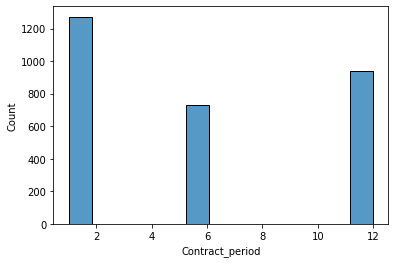

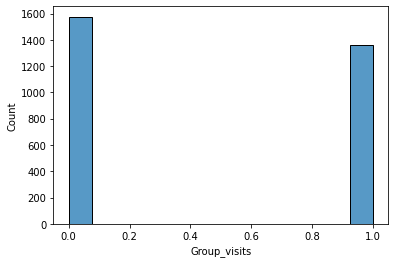

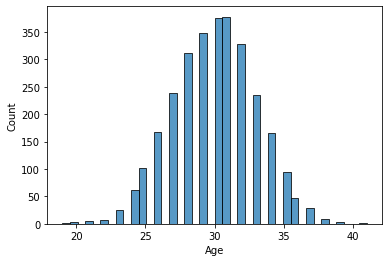

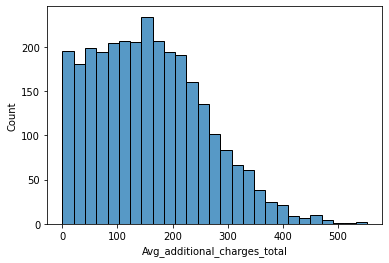

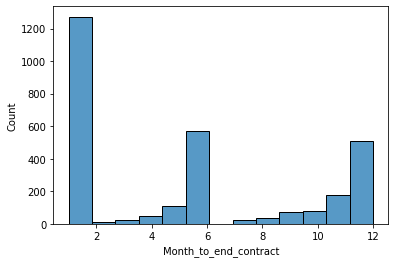

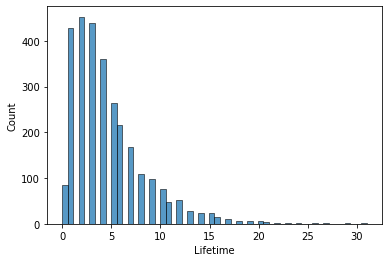

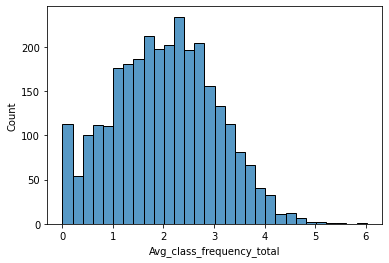

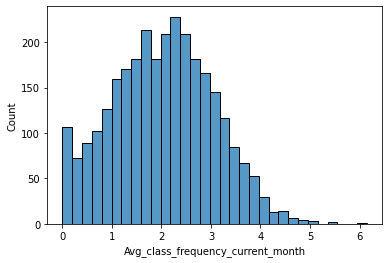

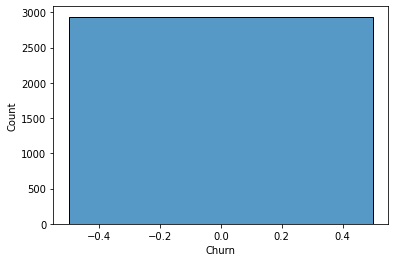

In [9]:
zuruck = data.query("Churn == 0")
columns = data.columns
for i in columns:
    sns.histplot(zuruck[i])
    plt.show()

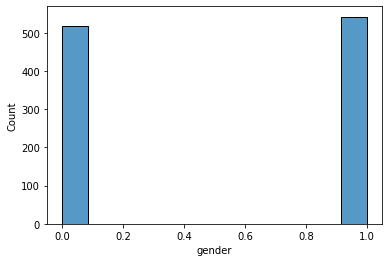

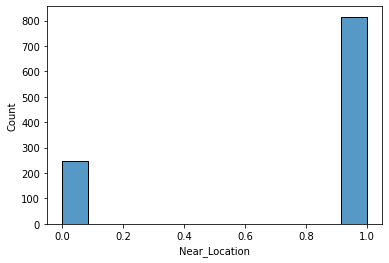

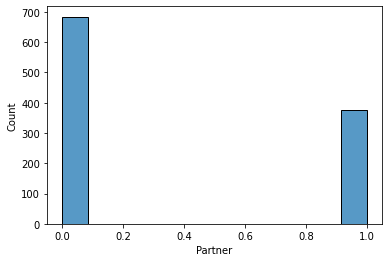

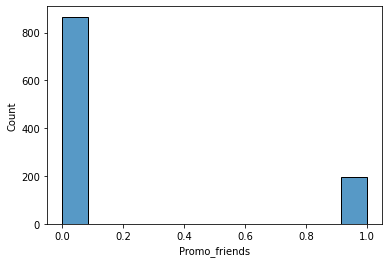

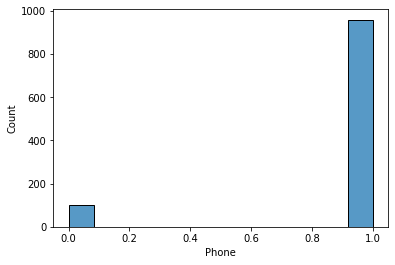

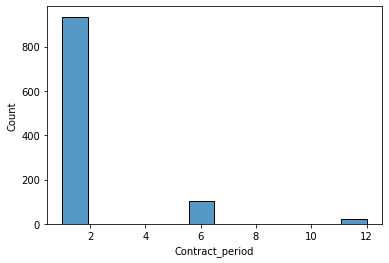

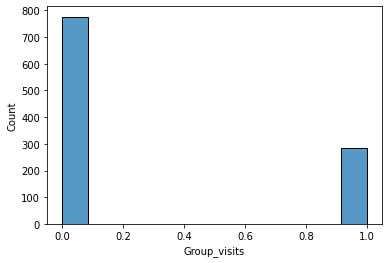

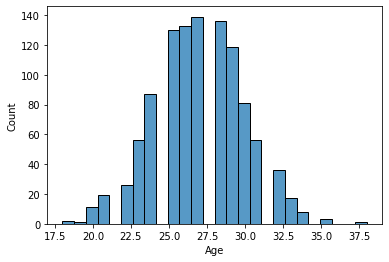

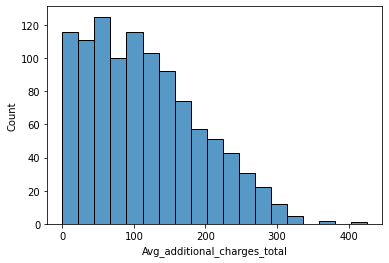

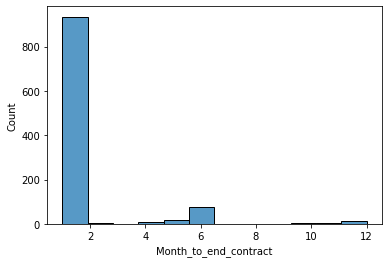

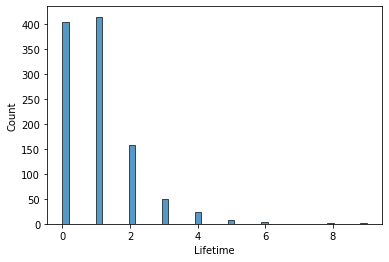

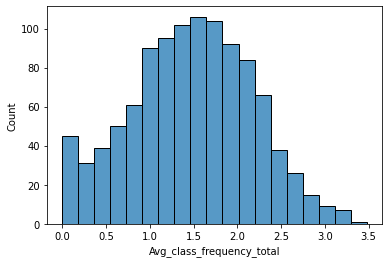

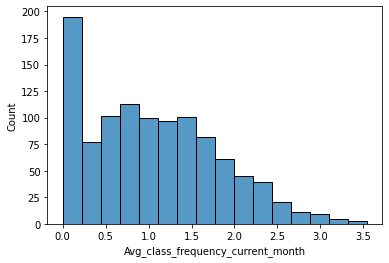

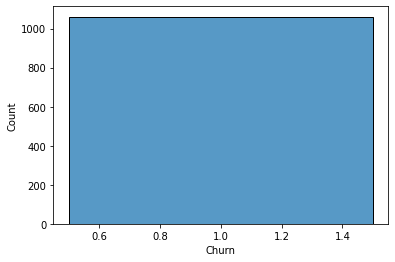

In [10]:
bleiben = data.query("Churn == 1")

for i in columns:
    sns.histplot(bleiben[i])
    plt.show()

По гистрограммам лучше видно возможные причины отсева клиентов - уходили чаще изза дальнего расположения фитнес центра более 800 случаев,есть отличия в партнерских программах без нее чаще уходили, факт первоначальной записи в рамках акции «приведи друга» по этой программе чаще уходили кто пришел по программе, попробовал и ушел.
С абонементом на 1-2 месяца чаще уходили,как и в возрасте 25-27 лет, по выручке те кто меньше тратил те раньше и уходили,при 1-2 месяцев до окончания абонемента, при 1-2 посещениях в месяц. В целом гитограммы более показательны для выявления оттока клиентов.

### Постройте матрицу корреляций и отобразите её

In [11]:
cm = data.corr()

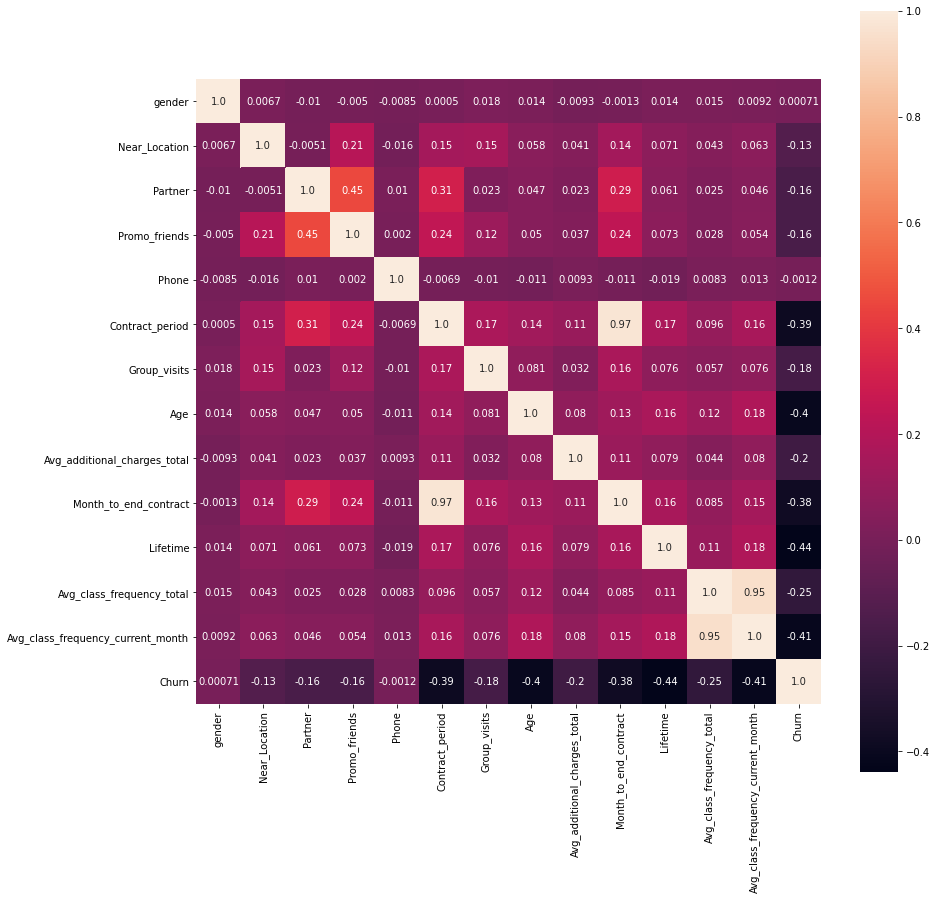

In [12]:
plt.figure(figsize=(14, 14))
sns.heatmap(cm, annot=True, fmt='0.02',square=True) 
plt.show()

Что видно из матрицы - кореляция многих признаков не высокая, ест пара моентов на уровне 0,45 у партнерской программы и акции приведи друга, по абонементу и партнерской программе кореляция - 0,31 и 0,29 по окончанию абонемента, остальные показатели не выокие, что касается оттока клиентов то отрицательная кореляция самая высокая видна на категориях - возраст (-0,4), время обращения с момента обращения в фитнес центр (-0,44) и время абонемента(-0,39) и расходы по приобретению спорттоваров и кафе при фитнес центре (-0,41), кроме последнего в приницпе ожидаемые показатели по оттоку клиентов, но что конкретно влияет увидем дальше.

### Вывод - пропусков нет, название столбцов оставил как есть, по матрице и гистрогаммам видны основые показатели оттока клиентов а это абнемент а точнее его окончание и срок, пользование допольнительными услугами фитнес центра т.е. сопрт товары, масажный салон и прочее, возраст, партнерская программа, и время обращения после первого визита. По данным - категорийных данных таблица не имеет, данныые готовы для построения модели.

## Шаг 3. Постройте модель прогнозирования оттока клиентов- Постройте модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце:

### Разбейте данные на обучающую и валидационную выборку функцией train_test_split().

In [13]:
#Размер узнаем
display(data.shape)

(4000, 14)

### Разбивка

In [14]:
# разделим наши данные на признаки (матрица X) и целевую переменную (y)
X = data.drop(columns = ['Churn'])
y = data['Churn']

In [15]:
# разделяем модель на обучающую и валидационную выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

### Обучите модель на train-выборке двумя способами:

#### логистической регрессией

In [16]:
# задайте алгоритм для нашей модели
model = LogisticRegression(solver='liblinear')

In [17]:
# обучите модель
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [18]:
# воспользуйтесь уже обученной моделью, чтобы сделать прогнозы
predictions = model.predict(X_test)
probabilities = model.predict_proba(X_test)[:,1]

#### случайным лесом

In [21]:
# зададим алгоритм для новой модели на основе алгоритма случайного леса
rf_model = RandomForestClassifier(n_estimators = 100,random_state=0)

In [22]:
# обучим модель случайного леса
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [23]:
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model.predict(X_test)
rf_probabilities = rf_model.predict_proba(X_test)[:, 1]

In [24]:
#display(rf_predictions)

In [25]:
#display(rf_probabilities)

#### Оцените метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравните по ним модели. Какая модель показала себя лучше на основании метрик?

In [26]:
def print_all_metrics(y_true, y_pred, y_proba, title='Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))

In [27]:
print_all_metrics(
    y_test,
    predictions,
    probabilities,
    title='Метрики для модели логистической регрессии:',
)

Метрики для модели логистической регрессии:
	Accuracy: 0.93
	Precision: 0.86
	Recall: 0.83


In [28]:
print_all_metrics(
    y_test,
    rf_predictions,
    rf_probabilities,
    title='Метрики для модели случайного леса:'
)

Метрики для модели случайного леса:
	Accuracy: 0.92
	Precision: 0.84
	Recall: 0.82


### Вывод - Accuracy - доля правильных ответов у логистической регрессии -0,93, у модели случайного леса - 0,92; Precision - Точность -  у 1го - 0,86, у 2го - 0,84, полнота(Recall) - 1-й 0,83, 2-й -0,82. Показатели очень схожие, лишь не большой первес имеет логистическая регрессия.

## Шаг 4. Сделайте кластеризацию клиентов

### Стандартизируйте данные

In [29]:
sc = StandardScaler()
x_sc = sc.fit_transform(data)

### Постройте матрицу расстояний функцией 

In [30]:
linked = linkage(x_sc, method = 'ward')

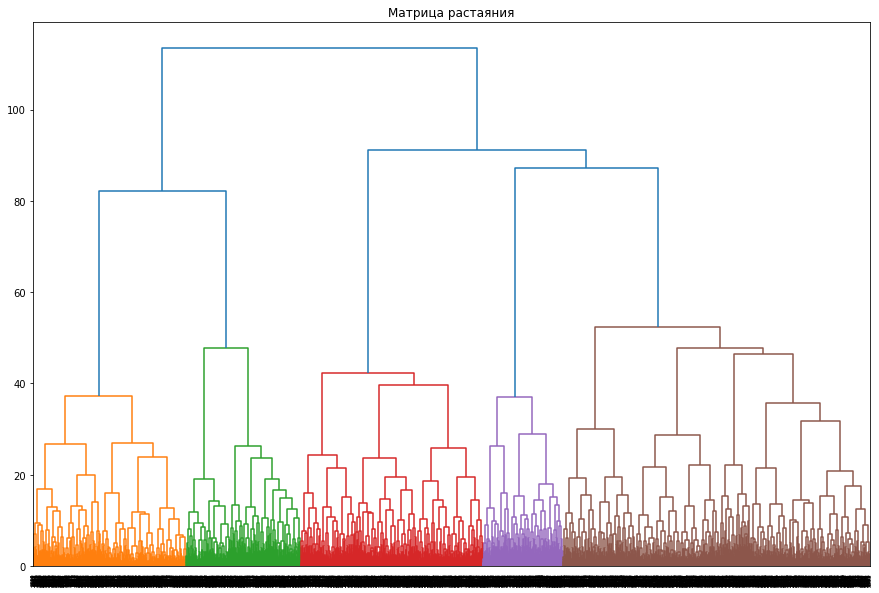

In [31]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Матрица растаяния')
plt.show() 

По дендограмме можно выделить 5  кластеров,на уровне от 60 до 80.

### Обучите модель кластеризации на основании алгоритма K-Means и спрогнозируйте кластеры клиентов. Договоримся за число кластеров принять n=5, чтобы ваши результаты можно было сравнивать с результатами остальных студентов. Однако, конечно, в жизни никто не скажет вам правильный ответ, и решение остаётся за вами (на основании изучения графика из предыдущего пункта).

In [32]:
# задаём модель k_means с числом кластеров 5 и фиксируем значение random_state
km = KMeans(n_clusters=5, random_state=0)

In [33]:
# прогнозируем кластеры для наблюдений (алгоритм присваивает им номера от 0 до 4)
labels = km.fit_predict(x_sc)

In [34]:
# сохраняем метки кластера в поле нашего датасета
data['cluster'] = labels

### Посмотрите на средние значения признаков для кластеров. Можно ли сразу что-то заметить?

In [35]:
# выводим статистику по средним значениям наших признаков по кластеру
display(data.groupby('cluster').mean())

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster,,,,,,,,,,,,,,
0,0.503676,0.000000,0.459559,0.075368,0.917279,2.069853,0.211397,28.522059,132.741216,1.950368,2.757353,1.706629,1.515890,0.450368
1,0.492829,0.936115,0.764016,0.534550,0.919166,10.447197,0.516297,29.962190,161.853561,9.477184,4.833116,2.788103,2.786919,0.007823
2,0.507917,1.000000,0.323995,0.213155,0.903776,1.546894,0.287454,26.926918,113.173051,1.500609,1.031669,1.449720,1.037592,0.961023
3,0.521186,0.996610,0.282203,0.208475,0.904237,1.882203,0.452542,30.237288,157.988625,1.794915,4.923729,2.203432,2.207359,0.003390
4,0.518895,0.968023,0.744186,0.526163,0.873547,8.859012,0.534884,29.728198,162.907495,8.155523,4.411337,0.957744,0.943967,0.024709


Пройдемся по выделеным кластерам - 
- 0й кластер - все клиенты далеко живут, деление по сотрудникам деление примерно одинаковое 50/50, но вот по акции  пришло очень мало клиентов,почти все оставили свои телефоны, лишь еденицы не указали своих контактных данных, по средним значениям клиенты имеют 2 месячный абонемент общий срок и до оканчания срока, средний возраст 28 лет, средний затраты на услуги фитнес клуба 133 уе, и как вывод 45 % отток клиентов при средних показателях.
- 1й кластер - пол, телефон, возраст такие же как и 0его кластера но с отличием в месте работы или места жительства = 0,9, показатель по акции ниже и = 0,53,но имеют абонемент на более дительный срок в среднем на 10 месяцев, траты на услуги самые высокие - 161 уе, и срок до окончания 9 меясцев, и как следствие самый высокий показатель по посещаемости.
- 2й кластер - клиенты близко живут, мало по акции записалось и мало клиентов клуба, с небольшим абонементом 1-2 меясца, возраст 26-27 лет, и минимальные затраты на услуги - 113 уе, и небольшое посещение и как следствие самый большой отток клиентов в 96%
- 3 й кластер - похож на 2 й но с разницей клиентов в озрасте 30 - 31 год, с высокими показателяями по услугам в фиитнес центра - 157 уе, и самый высокий показатель по посещаемости за неделю, и как следствие самый минимальный отток клиентов в 0,34%
- 4й кластер - клиенты находятся чуть подальше 3 го и 2го, больше всего пришли по акции и много сотрудников, длинный абонемент 8-9 месяцев, и возраст 29-30,и затраты на улуги 162 уе, и часто ходят в среднем 4-5 в неделю, и в итоге отток в 2,3%

In [36]:
display(data.groupby('cluster').mean())

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster,,,,,,,,,,,,,,
0,0.503676,0.000000,0.459559,0.075368,0.917279,2.069853,0.211397,28.522059,132.741216,1.950368,2.757353,1.706629,1.515890,0.450368
1,0.492829,0.936115,0.764016,0.534550,0.919166,10.447197,0.516297,29.962190,161.853561,9.477184,4.833116,2.788103,2.786919,0.007823
2,0.507917,1.000000,0.323995,0.213155,0.903776,1.546894,0.287454,26.926918,113.173051,1.500609,1.031669,1.449720,1.037592,0.961023
3,0.521186,0.996610,0.282203,0.208475,0.904237,1.882203,0.452542,30.237288,157.988625,1.794915,4.923729,2.203432,2.207359,0.003390
4,0.518895,0.968023,0.744186,0.526163,0.873547,8.859012,0.534884,29.728198,162.907495,8.155523,4.411337,0.957744,0.943967,0.024709


In [38]:
data_0 = data.query("Churn==1")

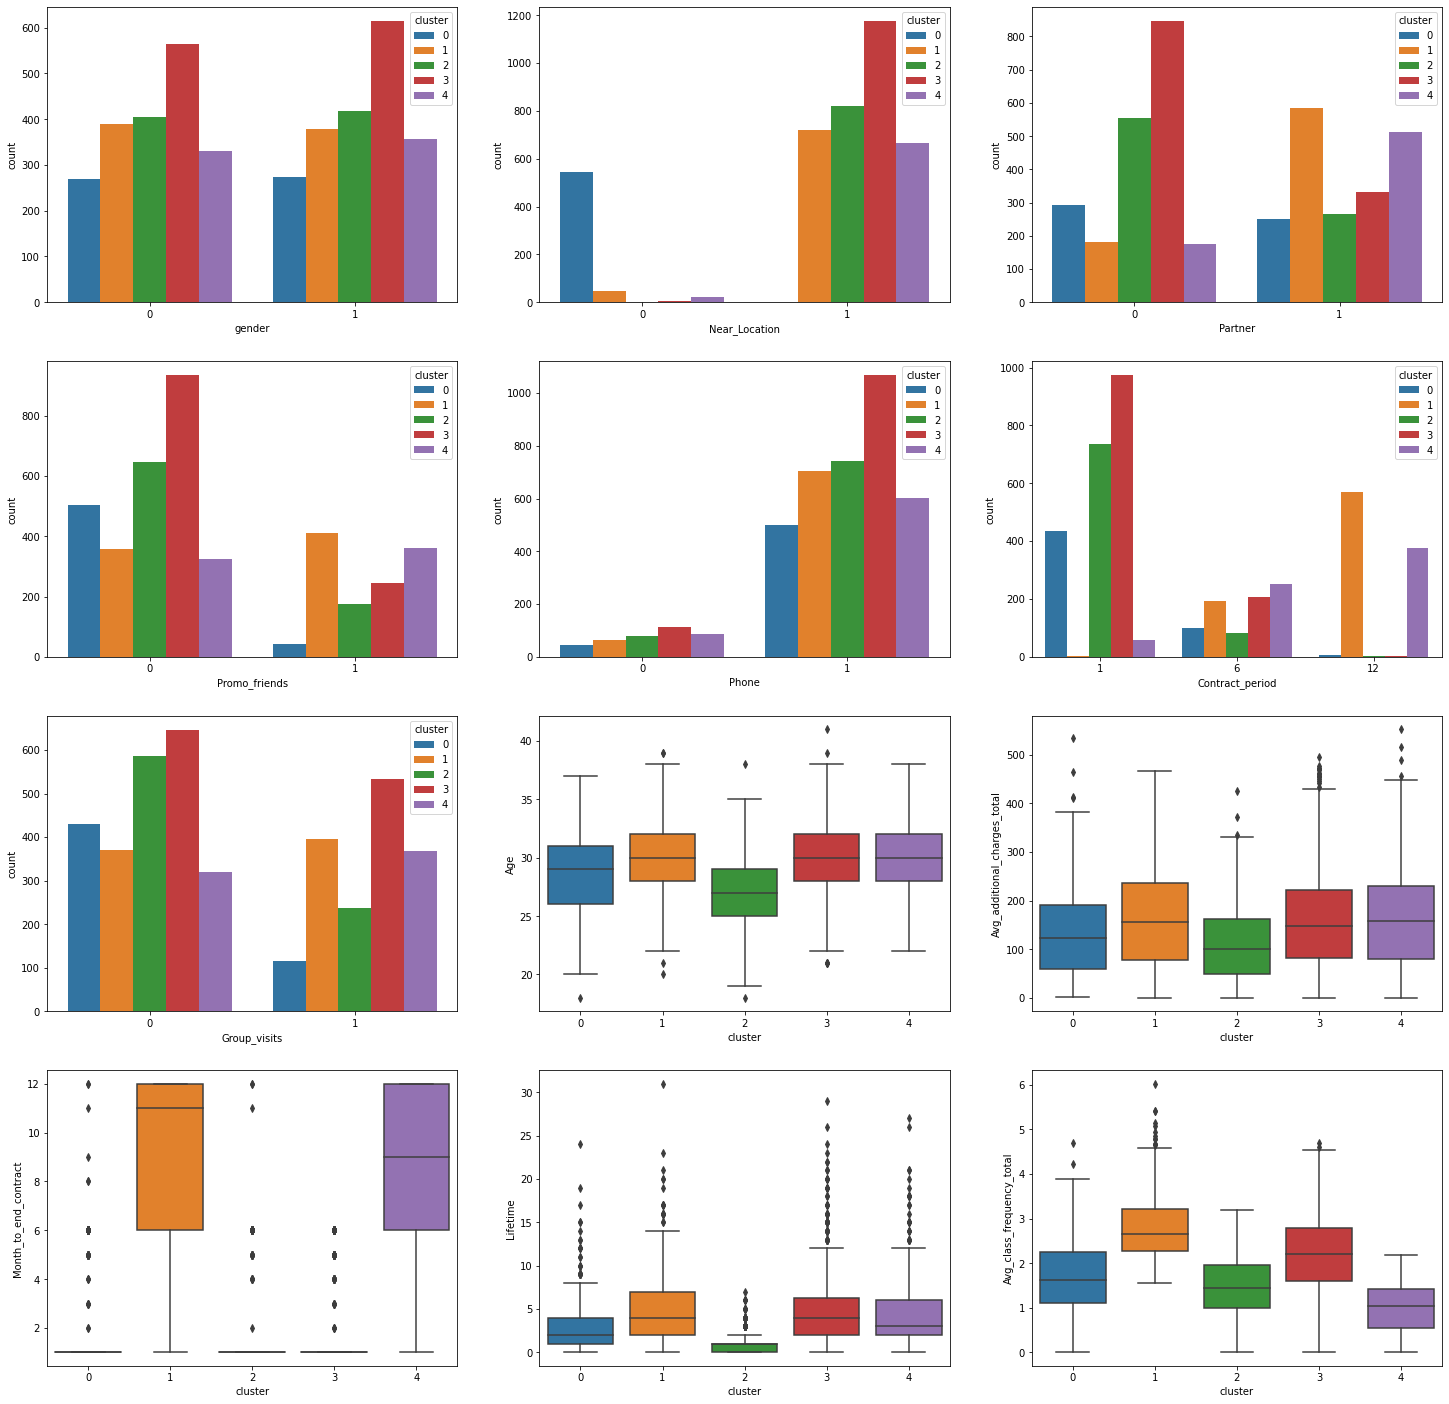

In [40]:

boxplot = ['Age', 'Avg_additional_charges_total', 'Lifetime', 'Avg_class_frequency_total', 
           'Avg_class_frequency_current_month','Month_to_end_contract']

plt.figure(figsize=(25, 25))
for i, column in enumerate(data.drop(['Churn', 'cluster','Avg_class_frequency_current_month'], axis=1).columns): 
    if column in boxplot:
        ax = plt.subplot(4, 3, i + 1)
        sns.boxplot(x=data['cluster'], y=data[column])
    else:
        ax = plt.subplot(4, 3, i + 1)
        sns.countplot(data=data, x=column, hue='cluster')

### Для каждого полученного кластера посчитайте долю оттока (методом groupby()). Отличаются ли они по доле оттока? Какие кластеры склонны к оттоку, а какие — надёжны?

In [41]:
data_nicht_zuruck = data_0.pivot_table(index = 'cluster',values = 'Churn', aggfunc='count' )
data_nicht_zuruck['toll'] = data.groupby("cluster")['Churn'].count()
data_nicht_zuruck['%'] = data_nicht_zuruck['Churn']/data_nicht_zuruck['toll']
data_nicht_zuruck

,Churn,toll,%
cluster,,,
0,245,544,0.450368
1,6,767,0.007823
2,789,821,0.961023
3,4,1180,0.003390
4,17,688,0.024709


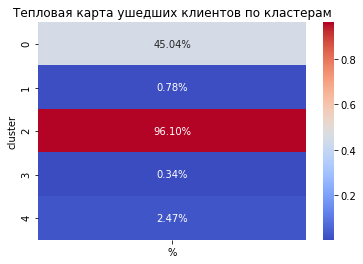

In [42]:
sns.heatmap(data_nicht_zuruck.drop(columns=['Churn','toll']), annot=True, fmt='.002%', cmap= 'coolwarm')
plt.title('Тепловая карта ушедших клиентов по кластерам')
plt.show()

Больше всего ушло из 2 кластера - 96% - 789 клиентов, и 0 го 45% - 245 клиентов, в остальных кластерах потеря клиентов не велика и состовляет в 1 и 3 не больше 0,5% и в 4 2,5%

## Шаг 5. Сформулируйте выводы и сделайте базовые рекомендации по работе с клиентами

Почему уходят люди? по данным полученым в анализе видно изза -
 - возраст 25-26 лет, Абонемент при аоплате на 1-2 месяца высокий шанс что клент уйдет, и срок до конца абонемента при 1-2 месяце, плюс типа халявщики которые пришли по акции попробовали и ушли, и по услугам фитнес центра, те кто не пользовались уходили.
 Как уменьшить отток - если с местом расположения трудно всем угодить как и с халявщиками, то с клиентами которые уходят улучшить качество продаваемых товаров в том же самом центре допольнительных услуг, по ситуации.
 - раз люди чаще уходят изза небольшого срока по абонементу 1-2 меясца и окончание его в тот же срок можно вводить акции разовые или постоянные на удержание клиента.
 - если смотрет по модели что обучилась то она показывает что основной уход у клиентов в возрасте 26-28 лет, у них и траты на допуслуги меньше чем по другим кластерам и абонемент максимум на пару месяцев и хоть есть кто пришол по приглашения или сотрудник всеравно не задерживается, значит что то людей не устраивает и с этим чтото надо делать, остальные кластер имеют низкий процент ухода но там и взрослее люди часто фитнес зал находится около дома или работы и посещаемость выше
 